In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [44]:
import pandas as pd
train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [45]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [46]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [47]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [48]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [49]:
train.shape()

TypeError: 'tuple' object is not callable

In [50]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [51]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [52]:
train.corr

<bound method DataFrame.corr of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

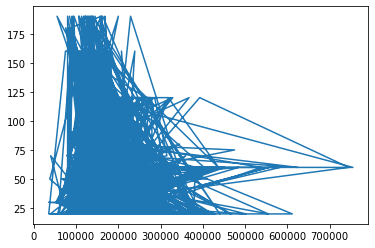

In [53]:
from matplotlib.pyplot import plot
plot(train['SalePrice'], train['MSSubClass'])

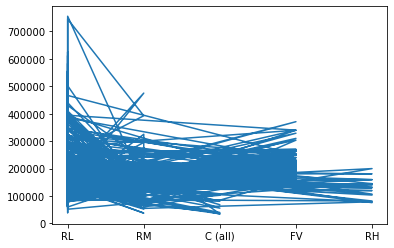

In [54]:
plot(train['MSZoning'], train['SalePrice'])

In [55]:
train['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [56]:
table=pd.pivot_table(data=train, index='MSZoning', values='SalePrice', aggfunc='mean')
table

,SalePrice
MSZoning,
C (all),74528.000000
FV,214014.061538
RH,131558.375000
RL,191004.994787
RM,126316.830275


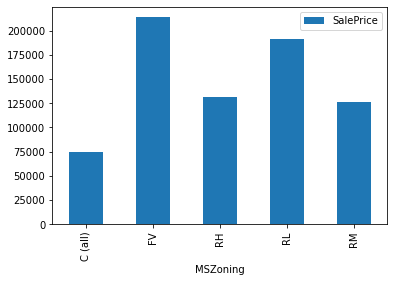

In [57]:
table.plot(kind='bar')

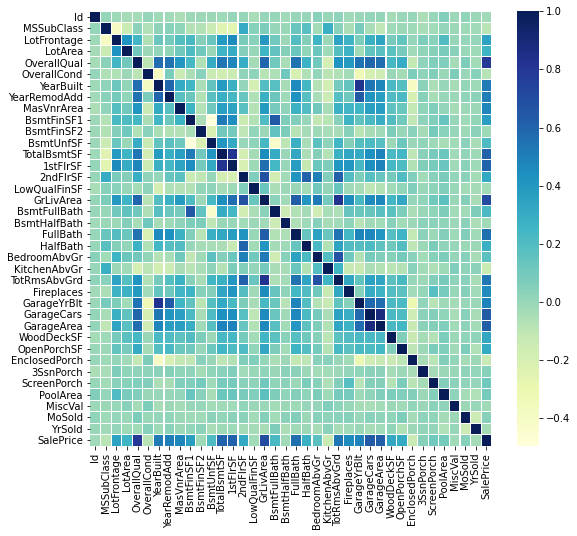

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = train.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [59]:
print(corrmat)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

In [60]:
#OverallCond GrLivArea TotalBsmtSF 1stFlrSF GarageCars GarageArea YearBuilt FullBath  TotRmsAbvGrd
x_train=train[['OverallCond', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 
             'YearBuilt', 'FullBath',  'TotRmsAbvGrd']]
x_train.head()

,OverallCond,GrLivArea,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea,YearBuilt,FullBath,TotRmsAbvGrd
0,5,1710,856,856,2,548,2003,2,8
1,8,1262,1262,1262,2,460,1976,2,6
2,5,1786,920,920,2,608,2001,2,6
3,5,1717,756,961,3,642,1915,1,7
4,5,2198,1145,1145,3,836,2000,2,9


In [61]:
x_train.isnull().sum()

OverallCond     0
GrLivArea       0
TotalBsmtSF     0
1stFlrSF        0
GarageCars      0
GarageArea      0
YearBuilt       0
FullBath        0
TotRmsAbvGrd    0
dtype: int64

In [62]:
x_test=test[['OverallCond', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 
             'YearBuilt', 'FullBath',  'TotRmsAbvGrd']]
x_test.head()

,OverallCond,GrLivArea,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea,YearBuilt,FullBath,TotRmsAbvGrd
0,6,896,882.0,896,1.0,730.0,1961,1,5
1,6,1329,1329.0,1329,1.0,312.0,1958,1,6
2,5,1629,928.0,928,2.0,482.0,1997,2,6
3,6,1604,926.0,926,2.0,470.0,1998,2,7
4,5,1280,1280.0,1280,2.0,506.0,1992,2,5


In [63]:
x_test.isnull().sum()

OverallCond     0
GrLivArea       0
TotalBsmtSF     1
1stFlrSF        0
GarageCars      1
GarageArea      1
YearBuilt       0
FullBath        0
TotRmsAbvGrd    0
dtype: int64

In [64]:
x_test['TotalBsmtSF'].fillna(test.TotalBsmtSF.median(), inplace=True)
x_test['GarageCars'].fillna(test.GarageCars.median(), inplace=True)
x_test['GarageArea'].fillna(test.GarageArea.median(), inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [65]:
x_test.isnull().sum()

OverallCond     0
GrLivArea       0
TotalBsmtSF     0
1stFlrSF        0
GarageCars      0
GarageArea      0
YearBuilt       0
FullBath        0
TotRmsAbvGrd    0
dtype: int64

In [97]:
import statsmodels.api as sm 
x=x_train
x= sm.add_constant(x) 
y=train['SalePrice']
predict_OLS = sm.OLS(y, x).fit() 

In [98]:
print(predict_OLS.summary()) 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     450.6
Date:                Mon, 04 Jan 2021   Prob (F-statistic):               0.00
Time:                        09:44:57   Log-Likelihood:                -17570.
No. Observations:                1460   AIC:                         3.516e+04
Df Residuals:                    1450   BIC:                         3.521e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.599e+06   9.95e+04    -16.064   

In [107]:
print('coefficient of determination:', predict_OLS.rsquared)
print('adjusted coefficient of determination:', predict_OLS.rsquared_adj)
print('regression coefficients:', predict_OLS.params)

coefficient of determination: 0.7366057215197354
adjusted coefficient of determination: 0.7349708604808923
regression coefficients: const          -1.599020e+06
OverallCond     1.021787e+04
GrLivArea       7.365123e+01
TotalBsmtSF     3.624394e+01
1stFlrSF        6.079352e+00
GarageCars      1.874520e+04
GarageArea      7.117802e+00
YearBuilt       7.807428e+02
FullBath       -1.764854e+03
TotRmsAbvGrd   -1.046106e+03
dtype: float64


In [103]:
x_test.columns
x_test1=x_test
x_test1=sm.add_constant(x_test1)

In [105]:
y_predict=predict_OLS.predict(x_test1)

In [106]:
y_predict.head()

0    113674.926034
1    158035.732425
2    201580.936568
3    209522.100316
4    188087.676134
dtype: float64

In [93]:
x_train.tail()

,const,OverallCond,GrLivArea,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea,YearBuilt,FullBath,TotRmsAbvGrd
1455,1.0,5,1647,953,953,2,460,1999,2,7
1456,1.0,6,2073,1542,2073,2,500,1978,2,7
1457,1.0,9,2340,1152,1188,1,252,1941,2,9
1458,1.0,6,1078,1078,1078,1,240,1950,1,5
1459,1.0,6,1256,1256,1256,1,276,1965,1,6


In [77]:
x_train.head(1)

,const,OverallCond,GrLivArea,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea,YearBuilt,FullBath,TotRmsAbvGrd
0,1.0,5,1710,856,856,2,548,2003,2,8


In [78]:
x_test.head(1)

,OverallCond,GrLivArea,TotalBsmtSF,1stFlrSF,GarageCars,GarageArea,YearBuilt,FullBath,TotRmsAbvGrd
0,6,896,882.0,896,1.0,730.0,1961,1,5


In [82]:
from sklearn.linear_model import Lars
X=x_train
y=train['SalePrice']
model=Lars()
model.fit(X, y)

Lars()

In [84]:
y_test=model.predict(x_test1)

In [85]:
y_test

array([113674.92603387, 158035.73242539, 201580.93656816, ...,
       177215.95758866, 109660.16198587, 245463.22987393])

In [86]:
submission_housing_prices=pd.DataFrame({'Id':test['Id'], 'SalePrice': y_test})
submission_housing_prices.head()

,Id,SalePrice
0,1461,113674.926034
1,1462,158035.732425
2,1463,201580.936568
3,1464,209522.100316
4,1465,188087.676134


In [87]:
submission_housing_prices.to_csv('submission_housing_prices.csv', index=False)